Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics

from shared.helpers import store_model
from shared.helpers import store_predictions_and_create_graph

Load dataset

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "period"
target_column = "value"
df = pd.read_csv(file_path, parse_dates=[date_column])
df = df[[date_column, target_column, 'value_30_hours_ago']]


df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
dates = df.index.values

Create model

In [3]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="H",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="superfast",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs=1,
)

Train test split, fit and prediction

In [4]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Train model

In [5]:
model.fit(train)

Data frequency is: H, used frequency is: H
Model Number: 1 with model AverageValueNaive in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model GLS in generation 0 of 5
Model Number: 5 with model GLS in generation 0 of 5
Model Number: 6 with model LastValueNaive in generation 0 of 5
Model Number: 7 with model LastValueNaive in generation 0 of 5
Model Number: 8 with model LastValueNaive in generation 0 of 5
Model Number: 9 with model LastValueNaive in generation 0 of 5
Model Number: 10 with model SeasonalNaive in generation 0 of 5
Model Number: 11 with model SeasonalNaive in generation 0 of 5
Model Number: 12 with model SeasonalNaive in generation 0 of 5
Model Number: 13 with model ConstantNaive in generation 0 of 5
Model Number: 14 with model SeasonalNaive in generation 0 of 5
Model Number: 15 with model SeasonalNaive in generation 0 of 5
Model Number: 16 with mod

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.1628e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 119 with model AverageValueNaive in generation 3 of 5
Model Number: 120 with model GLS in generation 3 of 5
Model Number: 121 with model SeasonalityMotif in generation 3 of 5
Model Number: 122 with model LastValueNaive in generation 3 of 5
Model Number: 123 with model ConstantNaive in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 123 in generation 3: ConstantNaive
Model Number: 124 with model GLS in generation 3 of 5
Model Number: 125 with model AverageValueNaive in generation 3 of 5
Model Number: 126 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer PCA failed on inverse') in model 126 in generation 3: AverageValueNaive
Model Number: 127 with model SeasonalNaive in generation 3 of 5
Model Number: 128 with model SeasonalNaive in generation 3 of 5
Model Number: 129 with model GLS in generation 3 of 5
Model Number: 130 with model SeasonalityMotif in generation 3 of 5
Mode

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 166 with model GLS in generation 4 of 5
New Generation: 5 of 5
Model Number: 167 with model GLS in generation 5 of 5
Model Number: 168 with model GLS in generation 5 of 5
Model Number: 169 with model SeasonalityMotif in generation 5 of 5
Model Number: 170 with model AverageValueNaive in generation 5 of 5
Model Number: 171 with model AverageValueNaive in generation 5 of 5
Model Number: 172 with model AverageValueNaive in generation 5 of 5
Model Number: 173 with model GLS in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 173 in generation 5: GLS
Model Number: 174 with model GLS in generation 5 of 5
Model Number: 175 with model AverageValueNaive in generation 5 of 5
Model Number: 176 with model SeasonalityMotif in generation 5 of 5
Model Number: 177 with model SeasonalityMotif in generation 5 of 5
Model Number: 178 with model SeasonalNaive in generation 5 of 5
Model Number: 179 with model AverageValueNaive in generation

Initiated AutoTS object with best model: 
SeasonalNaive
{'fillna': 'rolling_mean', 'transformations': {'0': 'SeasonalDifference', '1': 'Detrend'}, 'transformation_params': {'0': {'lag_1': 12, 'method': 'Median'}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}}}
{'method': 'mean', 'lag_1': 364, 'lag_2': 168}
Validation: 0, 1, 2, 3
SMAPE: 6.282138576807837, 6.922136612249441, 16.240078233263247, 10.224203198993695
MAE: 18835.633072286, 20773.4455005789, 42693.07363955831, 31768.983001097935
SPL: 1.3534431295223683, 1.5659566911184424, 2.5990742917419163, 0.9364344561953843

Best model

In [6]:
model.best_model

,ID,Model,ModelParameters,TransformationParameters,Ensemble
21,1f706a46faac9847df7a7ac68c68e5c1,SeasonalNaive,"{""method"": ""mean"", ""lag_1"": 364, ""lag_2"": 168}","{""fillna"": ""rolling_mean"", ""transformations"": ...",0


Predict

In [7]:
prediction = model.predict(forecast_length=len(test))

In [8]:
non_zero = []
for i in prediction.forecast[target_column]:
    removed_initial_one = i-1
    if removed_initial_one == 0:
        non_zero.append(removed_initial_one+sys.float_info.min)
    else:
        non_zero.append(removed_initial_one)

Plot results

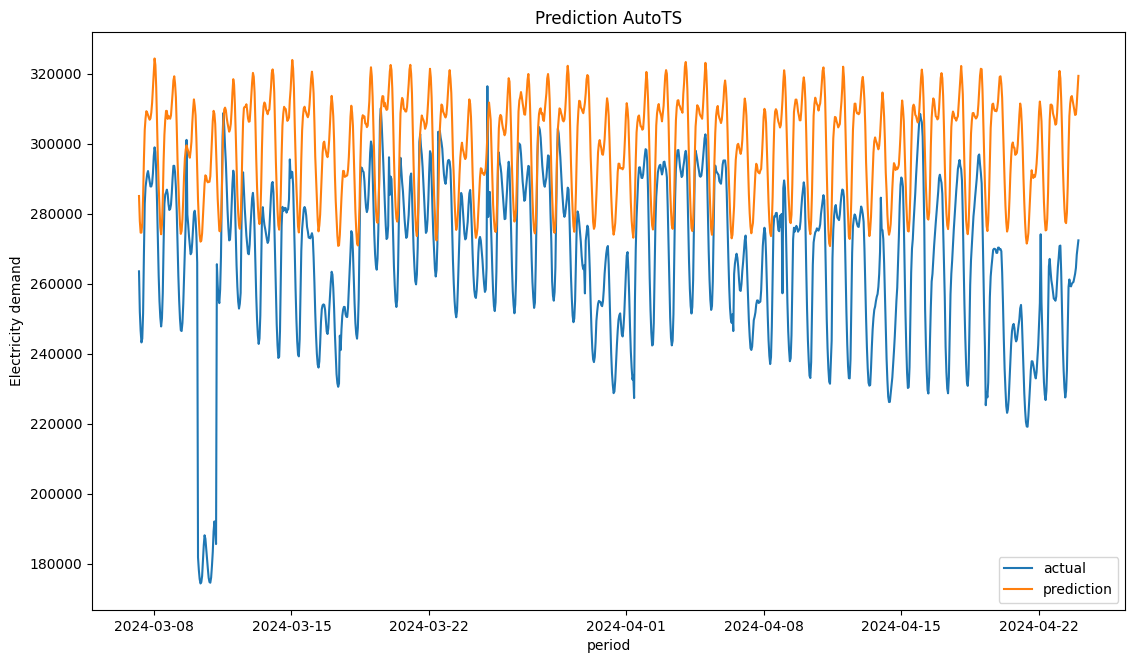

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], (test[target_column]-1).values, label="actual")
ax.plot(dates[int(data_length*train_split):], non_zero, label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("Electricity demand")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [10]:
print_evaluation_metrics(non_zero, test[target_column]-1, train[target_column] - 1)

Evaluation Metrics:
MSE: 1330371208.80
RMSE: 36474.25
MAE: 32590.40
MAPE: 12.83
SMAPE: 11.79
MASE: 4.45


Store model

In [11]:
store_model(model, "automl")

Store results and depict them on graph

In [1]:
store_predictions_and_create_graph("automl", dates[int(data_length*train_split):], non_zero, test[target_column]-1, "Electricity")

NameError: name 'store_predictions_and_create_graph' is not defined